## Overall introduction and basic information about data

https://www.kaggle.com/c/ieee-fraud-detection/data

In this competition you are predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.

The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.

-------------------------------------------------------------------------------------------------------------------------
Categorical Features - Transaction

ProductCD

card1 - card6

addr1, addr2

P_emaildomain

R_emaildomain

M1 - M9

------------------------------------------------------------------------------------------------------
Categorical Features - Identity

DeviceType

DeviceInfo

id_12 - id_38

----------------------------------------------------------------------------------------------------------

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

You can read more about the data from this post by the competition host.

------------------------------------------------------------------------------------------------------------------

Files
train_{transaction, identity}.csv - the training set
test_{transaction, identity}.csv - the test set (you must predict the isFraud value for these observations)
sample_submission.csv - a sample submission file in the correct format

In [79]:
import os 
import pandas as pd
import numpy as np

In [80]:
path = os.path.abspath('../data/')
os.listdir(path)

['Book1.twb',
 'joined_test.csv',
 'joined_train.csv',
 'sample_submission.csv',
 'tableau analysis.docx',
 'test_identity.csv',
 'test_transaction.csv',
 'train_identity.csv',
 'train_transaction.csv']

In [71]:
test_identity=pd.read_csv(path+'/test_identity.csv')
test_transaction=pd.read_csv(path+'/test_transaction.csv')
train_identity=pd.read_csv(path+'/train_identity.csv')
train_transaction=pd.read_csv(path+'/train_transaction.csv')

In [ ]:
print('shape of test_identity is {}; shape of test_transaction is {}'.format(test_identity.shape,test_transaction.shape))
print('shape of train_identity is {}; shape of train_transaction is {}'.format(train_identity.shape,train_transaction.shape))

In [10]:
test_identity.head(2)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T


In [11]:
test_transaction.head(2)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_identity.head(2)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device


In [13]:
train_transaction.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check for duplicate

In [73]:
# get trainning data with unique rows (keep the last row if there are duplicate):
train_identity_unique = train_identity.drop_duplicates()
train_transaction_unique = train_transaction.drop_duplicates()
train_identity_unique = train_identity_unique.reindex()
train_transaction_unique = train_transaction_unique.reindex()
print('shape of train_identity_unique is {}; shape of train_transaction_unique is {}'.format(train_identity_unique.shape,train_transaction_unique.shape))

shape of train_identity_unique is (144233, 41); shape of train_transaction_unique is (590540, 394)


In [74]:
# check whether there are duplicate rows for test data
# note: if there are, we still need to use original data sets in testing procedure.
test_identity_unique = test_identity.drop_duplicates(keep='last')
test_transaction_unique = test_transaction.drop_duplicates(keep='last')
test_identity_unique = test_identity_unique.reindex()
test_transaction_unique = test_transaction_unique.reindex()
print('shape of train_identity_unique is {}; shape of train_transaction_unique is {}'.format(test_identity_unique.shape,test_transaction_unique.shape))

shape of train_identity_unique is (141907, 41); shape of train_transaction_unique is (506691, 393)


shape of test_identity is (141907, 41); shape of test_transaction is (506691, 393)

shape of train_identity is (144233, 41); shape of train_transaction is (590540, 394)

So the good news is that, there are no dulicate rows. The original rows of the dataset is unique.

## Join two data sets together

If a TransactionID is in both data sets, we join all the imformation belongs to that ID to get new records.

In [75]:
train = pd.merge(train_transaction_unique, train_identity_unique, on='TransactionID', how='left')
test = pd.merge(test_transaction_unique, test_identity_unique, on='TransactionID', how='left')

In [44]:
print('shape of train is {}; shape of test is {}'.format(train.shape,test.shape))

shape of train is (590540, 434); shape of test is (506691, 433)


In [42]:
train.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
test.head(2)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### loss some data?
We don't loss any data when we join them together, which means all the IDs show in both data sets.

## Check data type and missing data

In [53]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [62]:
df_missing_train = missing_data(train)

In [63]:
df_missing_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Total,0,0,0,0,0,0,8933,1565,1577,4259,...,450258,512954,517251,512735,449555,449555,449555,449555,449730,471874
Percent,0,0,0,0,0,0,1.51268,0.265012,0.267044,0.721204,...,76.2451,86.8619,87.5895,86.8248,76.1261,76.1261,76.1261,76.1261,76.1557,79.9055
Types,int64,int64,int64,float64,object,int64,float64,float64,object,float64,...,object,float64,object,object,object,object,object,object,object,object


In [71]:
df_missing_train.loc[:,df_missing_train.loc['Total',:]==0]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,float64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


Only 20 columns (18 features) are without missing values.

The missing values will be a huge problem in this case, since there are some columns with more than 70~80% missing values.

get columns with more than 80% or 90% missing data

In [74]:
df_missing_train.loc[:,df_missing_train.loc['Percent',:]>=80]

,dist2,D6,D7,D8,D9,D12,D13,D14,V138,V139,...,id_22,id_23,id_24,id_25,id_26,id_27,id_30,id_32,id_33,id_34
Total,552913,517353,551623,515614,515614,525823,528588,528353,508595,508595,...,585371,585371,585793,585408,585377,585371,512975,512954,517251,512735
Percent,93.6284,87.6068,93.4099,87.3123,87.3123,89.041,89.5093,89.4695,86.1237,86.1237,...,99.1247,99.1247,99.1962,99.131,99.1257,99.1247,86.8654,86.8619,87.5895,86.8248
Types,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,object,float64,float64,float64,object,object,float64,object,object


There are 74 columns with more than 80%.... bad news

In [75]:
df_missing_train.loc[:,df_missing_train.loc['Percent',:]>=90]

,dist2,D7,id_07,id_08,id_18,id_21,id_22,id_23,id_24,id_25,id_26,id_27
Total,552913,551623,585385,585385,545427,585381,585371,585371,585793,585408,585377,585371
Percent,93.6284,93.4099,99.1271,99.1271,92.3607,99.1264,99.1247,99.1247,99.1962,99.131,99.1257,99.1247
Types,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,object


There are 12 columns with more than 90% mising data

In [67]:
# just take a look of test data to see if the situation is similar.
df_missing_test = missing_data(test)

In [68]:
df_missing_test

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Total,0,0,0,0,0,8654,3002,3086,4547,3007,...,370066,436020,436020,434516,369714,369714,369714,369714,369760,391634
Percent,0,0,0,0,0,1.70794,0.592472,0.60905,0.897391,0.593458,...,73.0358,86.0524,86.0524,85.7556,72.9664,72.9664,72.9664,72.9664,72.9754,77.2925
Types,int64,int64,float64,object,int64,float64,float64,object,float64,object,...,object,float64,object,object,object,object,object,object,object,object


In [72]:
df_missing_test.loc[:,df_missing_test.loc['Total',:]==0]

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,V95,V96,V97,V98,V99,...,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,float64,object,int64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


There are 48 columns (46 features) without missing values in test data. It seems to be better but still severe comparing to total 433 columns

## Check the imbalance of target variable

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

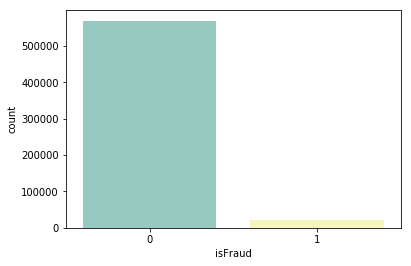

In [79]:
sns.countplot(train['isFraud'], palette='Set3')
plt.show()

There is severe inbalance of target variables

## Check for multicolinarity

### Corralation between columns

In [81]:
features=train.columns.values[2:]

In [82]:
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

,level_0,level_1,0
0,card1,V80,6.802607e-08
1,V80,card1,6.802607e-08
2,V294,V112,7.721540e-07
3,V112,V294,7.721540e-07
4,V88,card1,8.168735e-07
5,card1,V88,8.168735e-07
6,V300,V258,2.108870e-06
7,V258,V300,2.108870e-06
8,C7,V194,2.413776e-06
9,V194,C7,2.413776e-06


In [83]:
correlations.tail(10)

,level_0,level_1,0
160791,id_32,V73,NaN
160792,id_32,V74,NaN
160793,id_32,V75,NaN
160794,id_32,V76,NaN
160795,id_32,V79,NaN
160796,id_32,V90,NaN
160797,id_32,V91,NaN
160798,id_32,V94,NaN
160799,id_32,V107,NaN
160800,id_32,V305,NaN


看结果感觉correlation都挺小的，但可以把空值去掉再看看，因为空值实在太多了

## Output the joined trainning data to do the visualization

In [81]:
train.to_csv(path+'/joined_train.csv')

In [82]:
test.to_csv(path+'/joined_test.csv')

Some fancy plots will (plan to) to be drawn in tableau

## Data visualization for some interesting columns

reference：

https://www.kaggle.com/artgor/eda-and-models

https://www.kaggle.com/robikscube/ieee-fraud-detection-first-look-and-eda


In [87]:
train = pd.read_csv(path+'/joined_train.csv')

In [92]:
test = pd.read_csv(path+'/joined_test.csv')

## Data Exploration

In [53]:
sns.set_style('darkgrid')
%matplotlib inline

### Exploration for null value

id_01 - id_11 are continuous variables, id_12 - id_38 are categorical

Just as a mentioned before, there are severe data quality problem with respect to missing data. 

For example the following are plots for id_30 (platform type), id_31 (browser type), DeviceInfo and DeviceType

Please keep in mind that there is many other features like this with lots of missing value

In [ ]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns

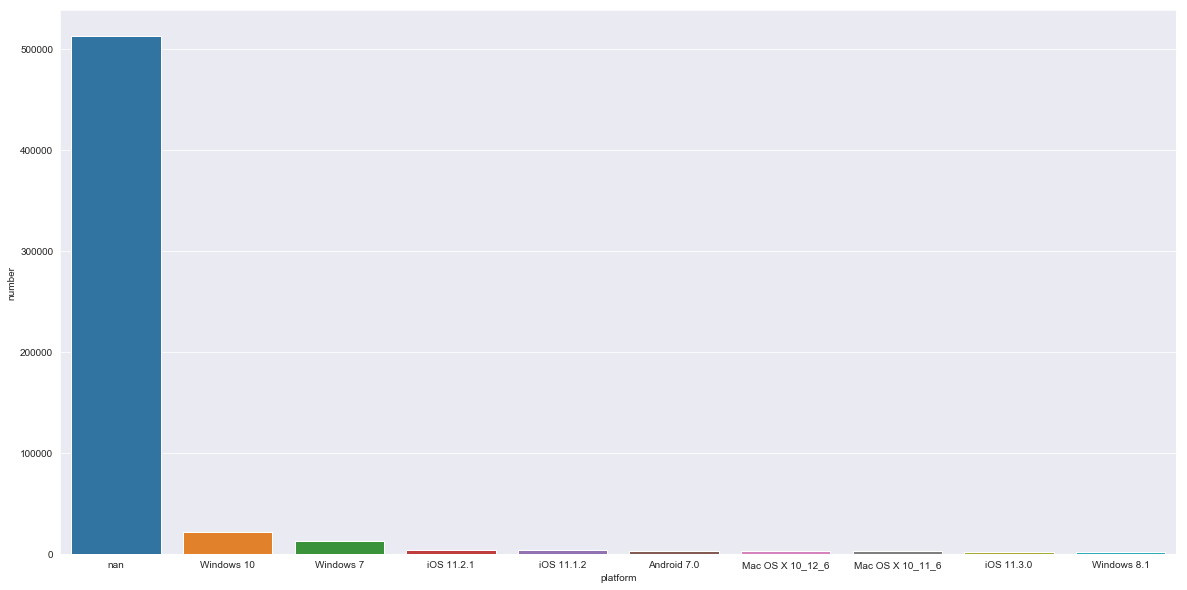

In [57]:
counter=collections.Counter(train['id_30'])
most_common_element = counter.most_common(10)
most_common_platform = pd.DataFrame(most_common_element,columns=['platform','number'])
most_common_platform['platform'] = most_common_platform['platform'].map(str)
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.barplot(x='platform',y='number', data = most_common_platform)
plt.show()

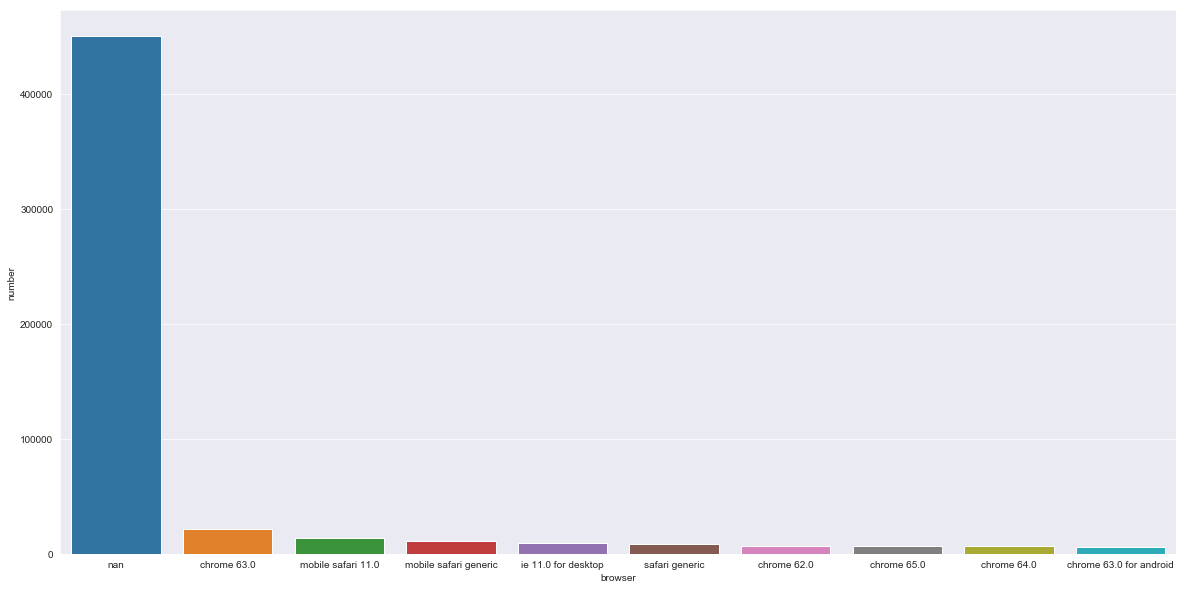

In [64]:
counter=collections.Counter(train['id_31'])
most_common_element = counter.most_common(10)
most_common_browser = pd.DataFrame(most_common_element,columns=['browser','number'])
most_common_browser['browser'] = most_common_browser['browser'].map(str)
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.barplot(x='browser',y='number', data = most_common_browser)
plt.show()

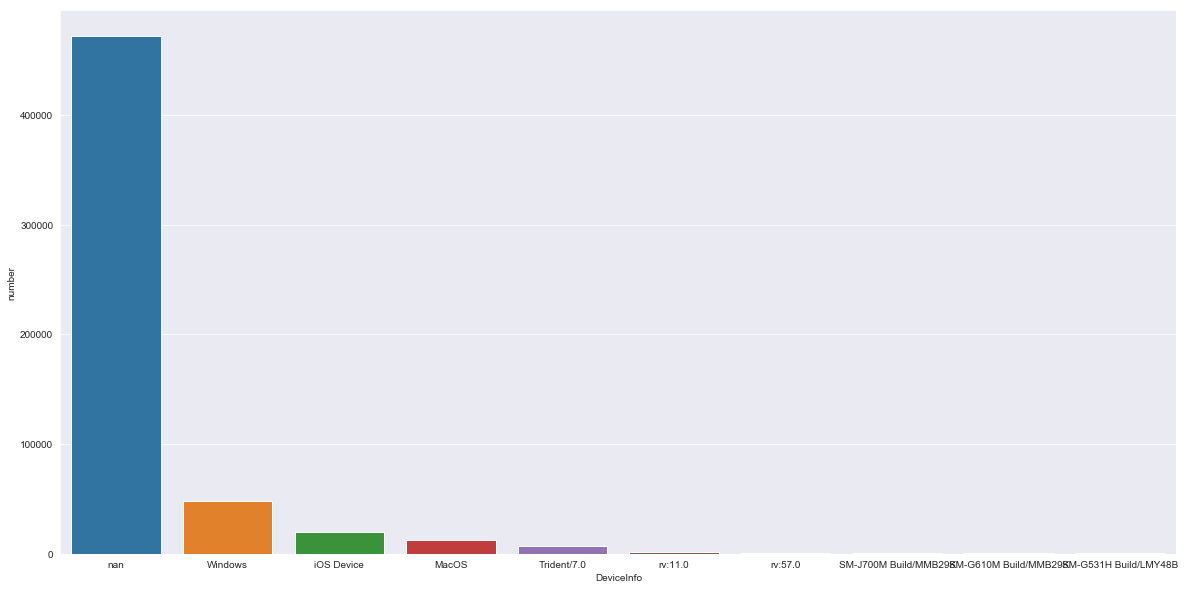

In [66]:
counter=collections.Counter(train['DeviceInfo'])
most_common_element = counter.most_common(10)
most_common_DeviceInfo = pd.DataFrame(most_common_element,columns=['DeviceInfo','number'])
most_common_DeviceInfo['DeviceInfo'] = most_common_DeviceInfo['DeviceInfo'].map(str)
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.barplot(x='DeviceInfo',y='number', data = most_common_DeviceInfo)
plt.show()

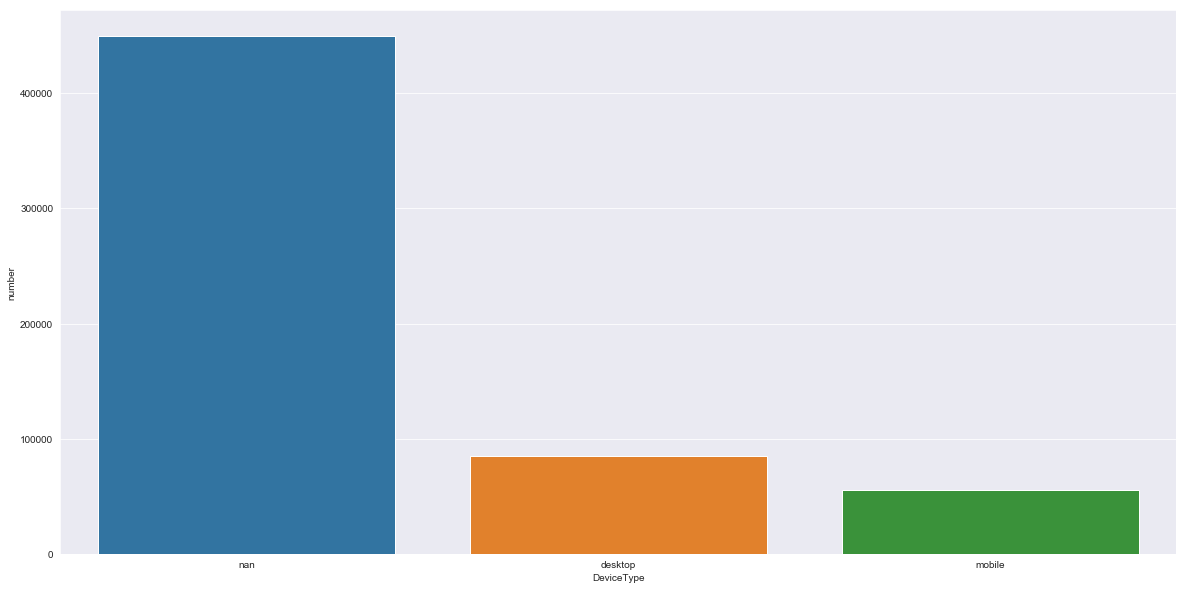

In [63]:
counter=collections.Counter(train['DeviceType'])
most_common_element = counter.most_common(10)
most_common_DeviceType = pd.DataFrame(most_common_element,columns=['DeviceType','number'])
most_common_DeviceType['DeviceType'] = most_common_DeviceType['DeviceType'].map(str)
fig,ax = plt.subplots(1,1,figsize=(20,10))
sns.barplot(x='DeviceType',y='number', data = most_common_DeviceType)
plt.show()

### Exploration for TransactionDT

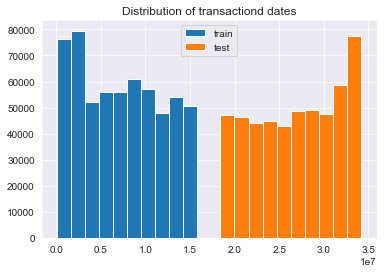

In [94]:
plt.hist(train['TransactionDT'], label='train')
plt.hist(test['TransactionDT'], label='test')
plt.legend()
plt.title('Distribution of transactiond dates')
plt.show()

The TransactionDT is the realtive time stamp of training and testing sets. Since they do not have overlap in two data sets, we can conclude that these two data sets are created based on the time. So, we should not use this feature in our model.

### Exploration for meanful columns

Since there are 434 columns and most of them don't have specific meaning, we have to build the model in the black box.

However, luckly, there are some features with specific meanings given by IEEE-CIS. We try to find some interesting patterns from them.  

https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

In [114]:
list(train.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

#### TransactionAmt

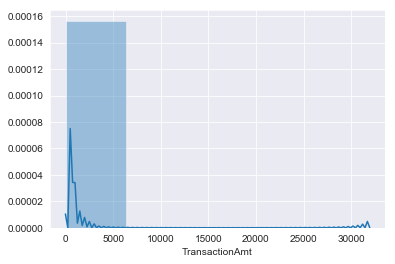

In [143]:
train['TransactionAmt'].head()     # create displot

sns.distplot(train['TransactionAmt'], bins=5)
plt.show()

It seems that most transaction amount are less than 2000.

In [144]:
# small vs. large

small_amt_num = sum(train['TransactionAmt'] < 2000)
large_amt_num = sum(train['TransactionAmt'] >= 2000)

print('Number of amount smaller than 2000 is {}; Number of amount larger than 2000 is {}'.format(small_amt_num,large_amt_num))


Number of amount smaller than 2000 is 588500; Number of amount larger than 2000 is 2040


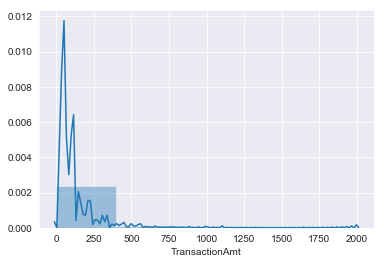

In [147]:
sns.distplot(train.loc[train['TransactionAmt']<2000,'TransactionAmt'], bins=5)
plt.show()

It seems that most transaction amount are less than 400.

In [150]:
small_amt_num = sum(train['TransactionAmt'] < 400)
large_amt_num = sum(train['TransactionAmt'] >= 400)

print('Number of amount smaller than 400 is {}; Number of amount larger than 400 is {}'.format(small_amt_num,large_amt_num))

Number of amount smaller than 400 is 556759; Number of amount larger than 400 is 33781


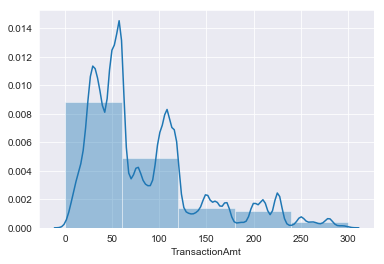

In [153]:
sns.distplot(train.loc[train['TransactionAmt']<300,'TransactionAmt'], bins=5)
plt.show()

It's very obvious that most transaction amount are very small.

#### card type

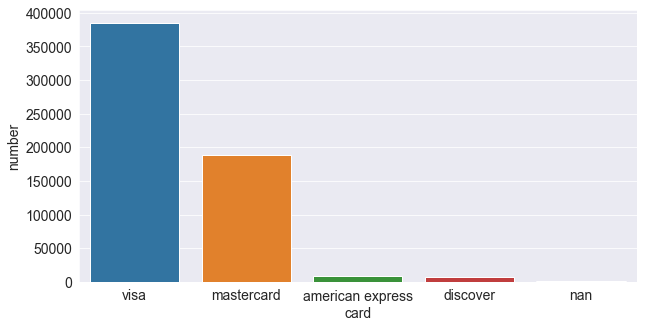

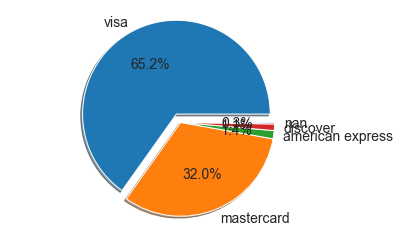

In [170]:
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
counter=collections.Counter(train['card4'])
most_common_element = counter.most_common(10)
most_common_card = pd.DataFrame(most_common_element,columns=['card','number'])
most_common_card['card'] = most_common_card['card'].map(str)
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='card',y='number', data = most_common_card)
plt.show()

fig1, ax1 = plt.subplots()
explode = (0.1, 0,0,0,0)
ax1.pie(x='number', labels='card', data=most_common_card, shadow =True, explode= explode, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

#### broad card type

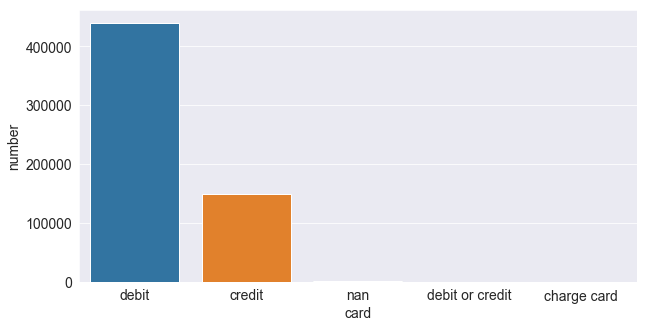

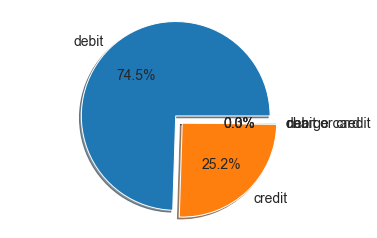

In [171]:
matplotlib.rcParams.update({'font.size': 14})
counter=collections.Counter(train['card6'])
most_common_element = counter.most_common(10)
most_common_card = pd.DataFrame(most_common_element,columns=['card','number'])
most_common_card['card'] = most_common_card['card'].map(str)
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='card',y='number', data = most_common_card)
plt.show()

fig1, ax1 = plt.subplots()
explode = (0.1, 0,0,0,0)
ax1.pie(x='number', labels='card', data=most_common_card, shadow =True, explode= explode, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

#### purchaser email domain

In [204]:
# purchaser email domain
train['P_emaildomain'].unique()

counter=collections.Counter(train['P_emaildomain'])
most_common_element = counter.most_common(6)
print(sum(list(map(lambda x: x[1], most_common_element))))
print(sum(list(map(lambda x: x[1], most_common_element)))/train['P_emaildomain'].shape[0])

534282
0.9047346496426999


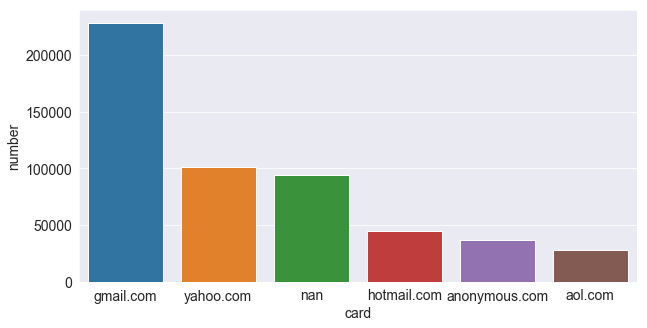

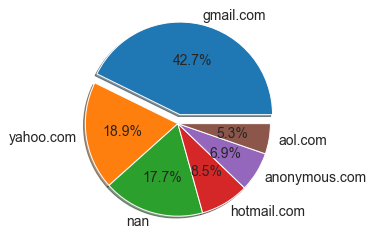

In [203]:
matplotlib.rcParams.update({'font.size': 14})
most_common_card = pd.DataFrame(most_common_element,columns=['card','number'])
most_common_card['card'] = most_common_card['card'].map(str)
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='card',y='number', data = most_common_card)
plt.show()

fig1, ax1 = plt.subplots()
explode = (0.1, 0,0,0,0,0)
ax1.pie(x='number', labels='card', data=most_common_card, shadow =True, explode= explode, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

#### recipient email domain

In [207]:
# recipient email domain
train['R_emaildomain'].unique()

counter=collections.Counter(train['R_emaildomain'])
most_common_element = counter.most_common(6)
print(sum(list(map(lambda x: x[1], most_common_element))))
print(sum(list(map(lambda x: x[1], most_common_element)))/train['P_emaildomain'].shape[0])

573977
0.9719527889728046


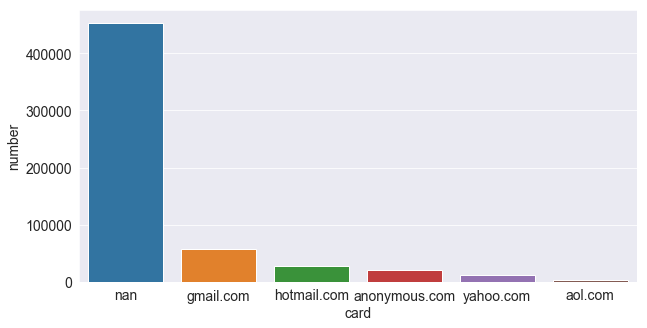

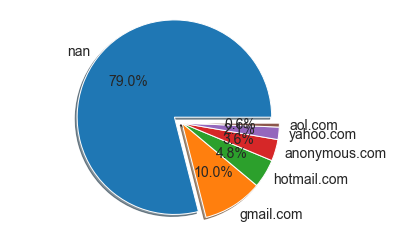

In [208]:
matplotlib.rcParams.update({'font.size': 14})
most_common_card = pd.DataFrame(most_common_element,columns=['card','number'])
most_common_card['card'] = most_common_card['card'].map(str)
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.barplot(x='card',y='number', data = most_common_card)
plt.show()

fig1, ax1 = plt.subplots()
explode = (0.1, 0,0,0,0,0)
ax1.pie(x='number', labels='card', data=most_common_card, shadow =True, explode= explode, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()